In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/AnalysisTreesInformation/AnaTreesPackage/notebooks/')
from notebooks_tools import * 
%matplotlib inline

In [230]:
columns=['startx','starty','startz','endx','endy','endz','theta','phi','length','distlenratio']

In [233]:
MCC8extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MCC8_extBNB_AnalysisTrees.csv',usecols=columns)
print 'read MCC 8'
MCC7extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_extBNB_AnalysisTrees.csv',usecols=columns)
print 'read MCC 7'

read MCC 8
read MCC 7


In [183]:
MCC8extBNBevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/events_features_MCC8_extBNB_AnalysisTrees.csv')
MCC7extBNBevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/events_features_MCC7_extBNB_AnalysisTrees.csv')

# MCC-8 extBNB plots

In [127]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

def add_retreat_label(xtext=None,ytext=None):
    label = 'cohen.erez7@gmail.com, mini-retreat (Feb-2017)'
    if xtext is not None and ytext is not None:
        plt.text(xtext,ytext,label)
    else:
        plt.figtext(0.1,0.05,label)

In [129]:
def plot_errorbar_histogram(data=MCC8extBNB , data_name = 'MCC8-extBNB, contained pandoraCosmic tracks',
                            var='startx' , 
                            x_label = '$x_{start}$ [cm]', y_label='counts',
                            bins=50,  figsize=(16,10) , ticks_color='black',
                            do_add_retreat_label=True,do_save_fig=True):
    
    ax , h , bins , mid = hist_with_errors( data[var] , bins=bins, figsize=figsize)
    set_axes(ax=ax, x_label=x_label,y_label=y_label, ticks_color=ticks_color)
    ax.set_title(data_name,fontsize=25,y=1.02)
    ax.set_xlim(bins.min(),bins.max())
    if do_add_retreat_label: 
        add_retreat_label()
    if do_save_fig:
        plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_%s.pdf'%(namestr(data, globals()),var))

In [226]:
def plot_histstep(x,bins=None,color=None,label=None,linestyle='-',normed=1):
    h,bins,_ = plt.hist( x , bins=bins, histtype='step', linewidth=0 ,normed=normed)
    mid = 0.5*(bins[1:] + bins[:-1])+0.5*(bins[1] - bins[0])
    plt.plot( mid , h , linestyle=linestyle, drawstyle='steps' , color=color, linewidth=3 , label=label )
    return h,bins,mid

In [213]:
def plot_2d_histogram(data=MCC8extBNB , data_name = 'MCC8-extBNB, contained pandoraCosmic tracks',
                      varx='startx' , vary='starty' , mul_x=1, mul_y=1,
                      x_label = '$x_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                      cmap='hot_r',norm='normal',
                      binsx=50, binsy=50,  figsize=(16,10) , ticks_color='black', fontsize=25,
                      do_add_retreat_label=True,do_save_fig=True,do_add_title=True,ax=None):
    
    
    plot2d = plot_2d_hist( mul_x*data[varx] , mul_y*data[vary] , 
                 bins=(binsx,binsy) , cmap=cmap,
                 xlabel=x_label , ylabel=y_label, norm=norm,
                 figsize=figsize , fontsize=fontsize , ticks_color=ticks_color , ax=ax);
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=fontsize,labelcolor=ticks_color)

    counts, xedges, yedges, Image, ax = plot2d 
    if do_add_title:
        ax.set_title(data_name,fontsize=25,y=1.02)


    if do_add_retreat_label: 
        add_retreat_label()
    if do_save_fig:
        plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_%s_vs_%s.png'%(namestr(data, globals()),varx,vary))

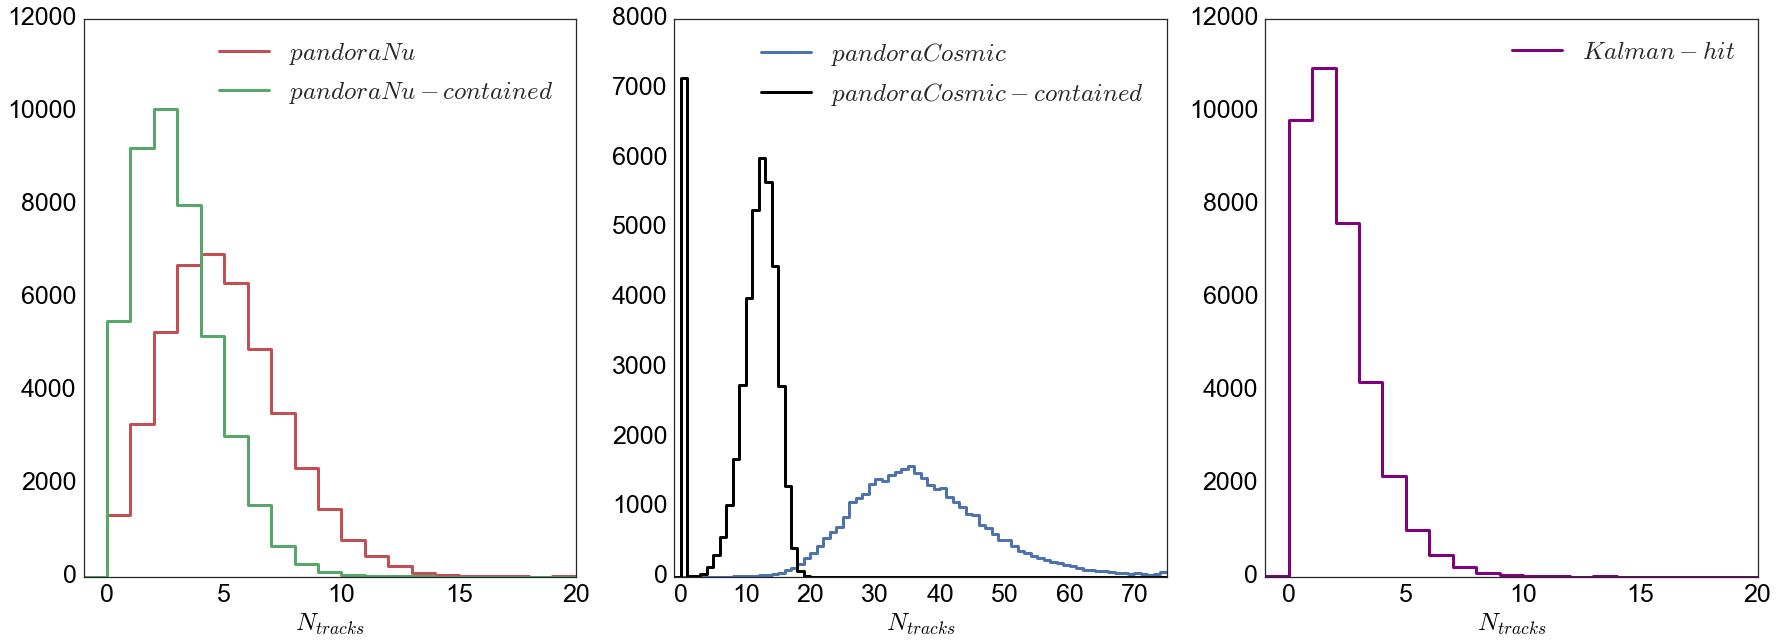

In [210]:
variables = ['Ntracks_pandoraNu','Ntracks_pandoraNu_Contained','Ncosmictracks_pandoraCosmic','Ncosmictracks_pandoraCosmic_Contained' , 'Ntracks_kalmanhit']
var_names = ['$pandoraNu$' , '$pandoraNu-contained$' , '$pandoraCosmic$', '$pandoraCosmic-contained$', '$Kalman-hit$']
Ntrackmax = [20 , 75 , 20]
colors = ['r','g','b','black','purple','c']
fig=plt.figure(figsize=(30,10))
i_subplot = 0
for i_type,var,label,color in zip(range(len(variables)),variables,var_names,colors):
    
    if i_type%2==0:
        xmax = Ntrackmax[i_subplot]
        i_subplot += 1
        ax=fig.add_subplot(1,3,i_subplot)

    h,bins,_ = plt.hist( MCC8extBNBevents[var] , bins=np.linspace(-5,xmax,(xmax+5)+1)
                        , histtype='step', linewidth=0 )
    mid = 0.5*(bins[1:] + bins[:-1])+0.5*(bins[1] - bins[0])
    plt.plot( mid , h , linestyle='-', drawstyle='steps' , color=color, linewidth=3 , label=label )

    set_axes(ax,x_label = '$N_{tracks}$', y_label='',fontsize=25)    
    ax.legend(loc='best',fontsize=25)
    ax.set_xlim(-1,xmax)

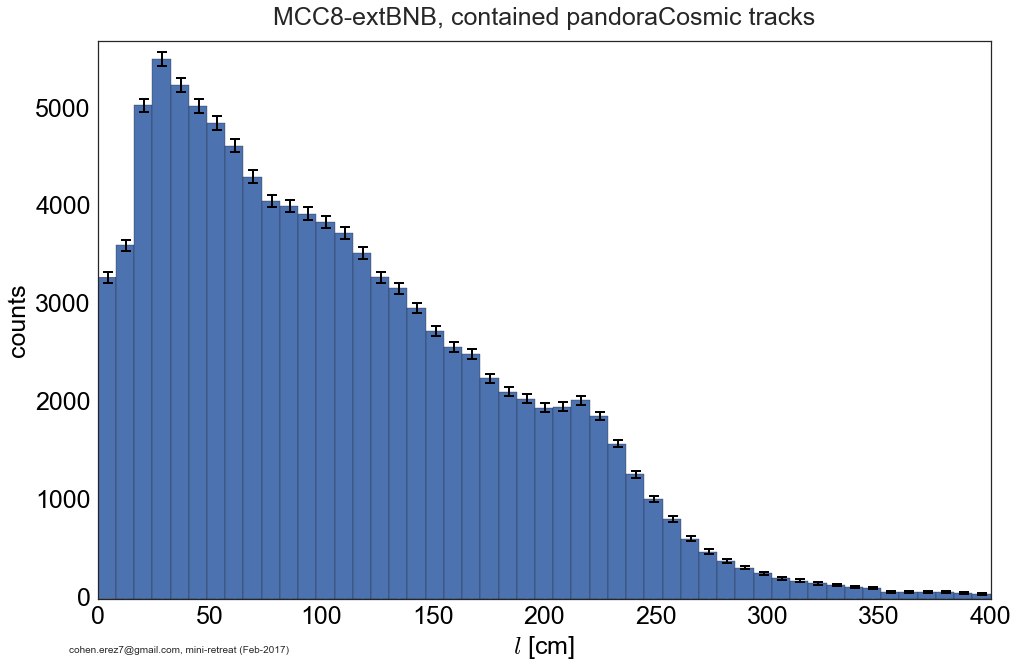

In [184]:
plot_errorbar_histogram(data=MCC8extBNB ,var='length' , x_label = '$l$ [cm]', 
                            bins=np.linspace(-0.1,400,50))

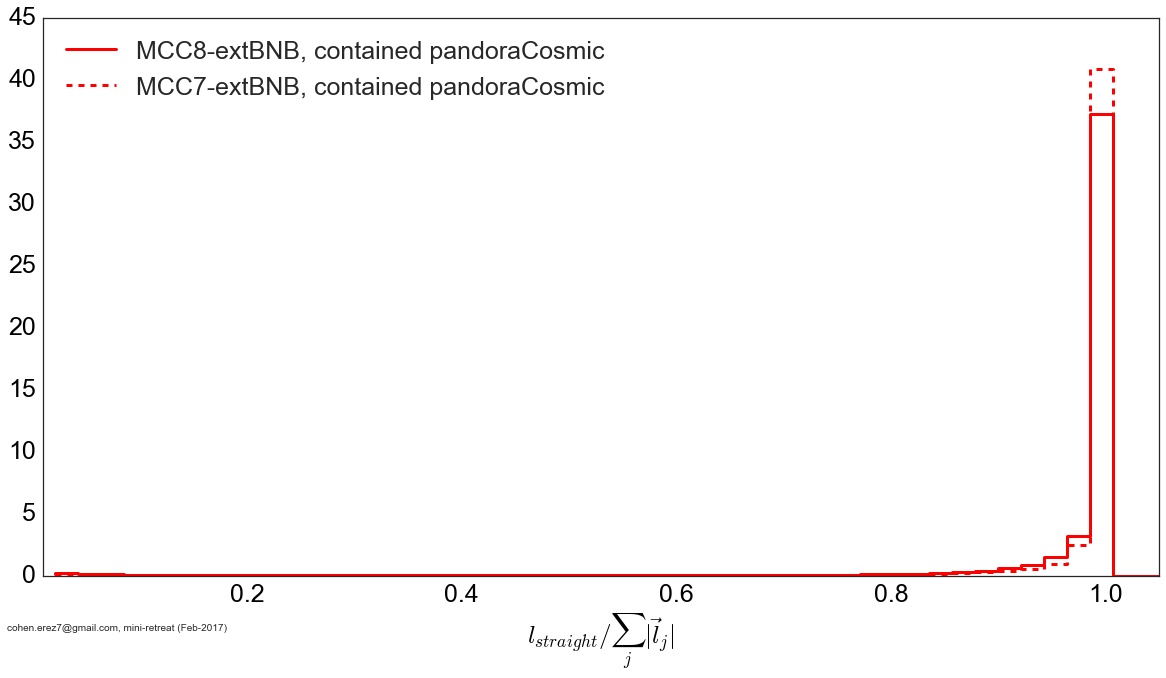

In [234]:
bins=np.linspace(0,1.05,50)
fig,ax = plt.subplots(figsize=(20,10))

h,bins,mid = plot_histstep(x=MCC8extBNB[MCC8extBNB.distlenratio>-1].distlenratio ,
                           bins=bins,color='red',label='MCC8-extBNB, contained pandoraCosmic',normed=1)
h,bins,mid = plot_histstep(x=MCC7extBNB[MCC7extBNB.distlenratio>-1].distlenratio ,
                           bins=bins,color='red',linestyle='--',label='MCC7-extBNB, contained pandoraCosmic',normed=1)

set_axes(ax,x_label='$l_{straight} / \\sum_j |\\vec{l}_j| $',y_label='',fontsize=25)
ax.legend(fontsize=25,loc='best')
add_retreat_label()
ax.set_xlim(0.01,1.05)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/distlenratio.png')

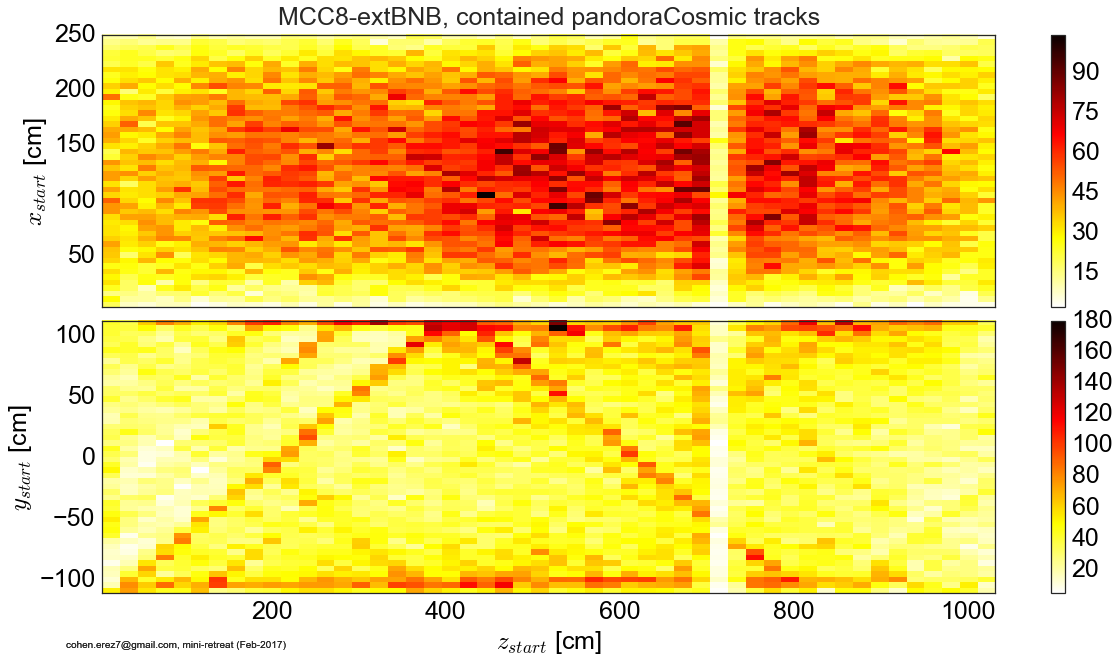

In [217]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
plot_2d_histogram(data=MCC8extBNB , varx='startz' , vary='startx' ,                      
                  x_label = '', y_label='$x_{start}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False                 
                  )
ax.xaxis.set_major_formatter( NullFormatter() )

ax = fig.add_subplot(2,1,2)
plot_2d_histogram(data=MCC8extBNB , varx='startz' , vary='starty' ,                      
                  x_label = '$z_{start}$ [cm]', y_label='$y_{start}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
plt.subplots_adjust(hspace=0.05)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_start_coordinates.png'%namestr(MCC8extBNB, globals()))

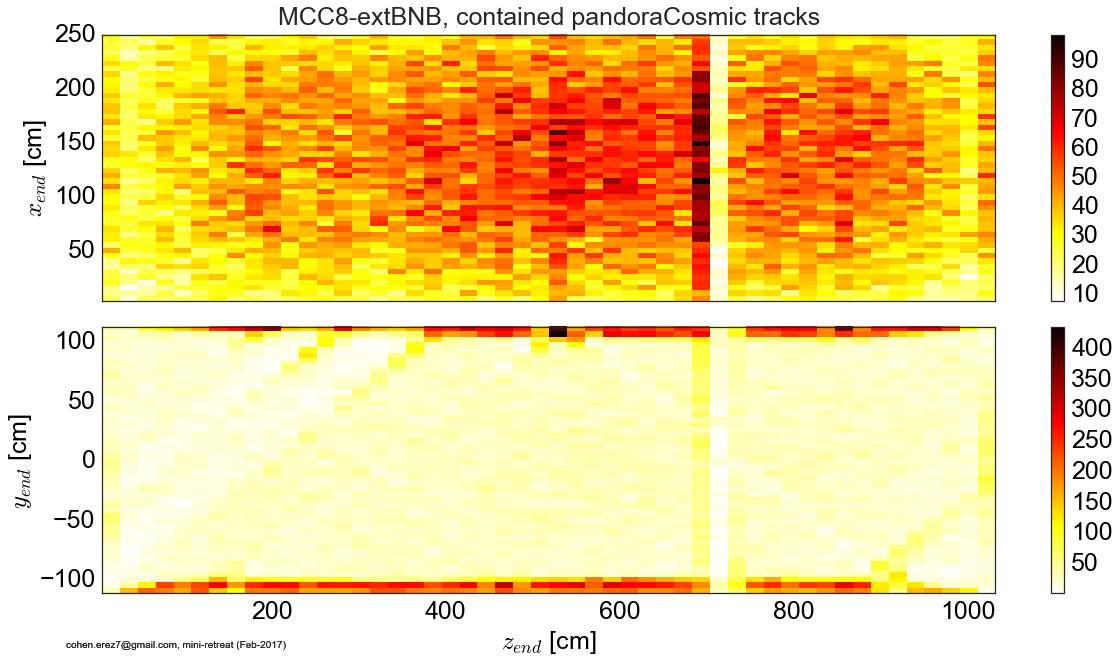

In [216]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
plot_2d_histogram(data=MCC8extBNB , varx='endz' , vary='endx' ,                      
                  x_label = '', y_label='$x_{end}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False                 
                  )
ax.xaxis.set_major_formatter( NullFormatter() )

ax = fig.add_subplot(2,1,2)
plot_2d_histogram(data=MCC8extBNB , varx='endz' , vary='endy' ,                      
                  x_label = '$z_{end}$ [cm]', y_label='$y_{end}$ [cm]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
plt.subplots_adjust(hspace=0.1)
plt.savefig('/Users/erezcohen/Desktop/uBoone/analysis/retreats/Feb2017/%s_end_coordinates.png'%namestr(MCC8extBNB, globals()))

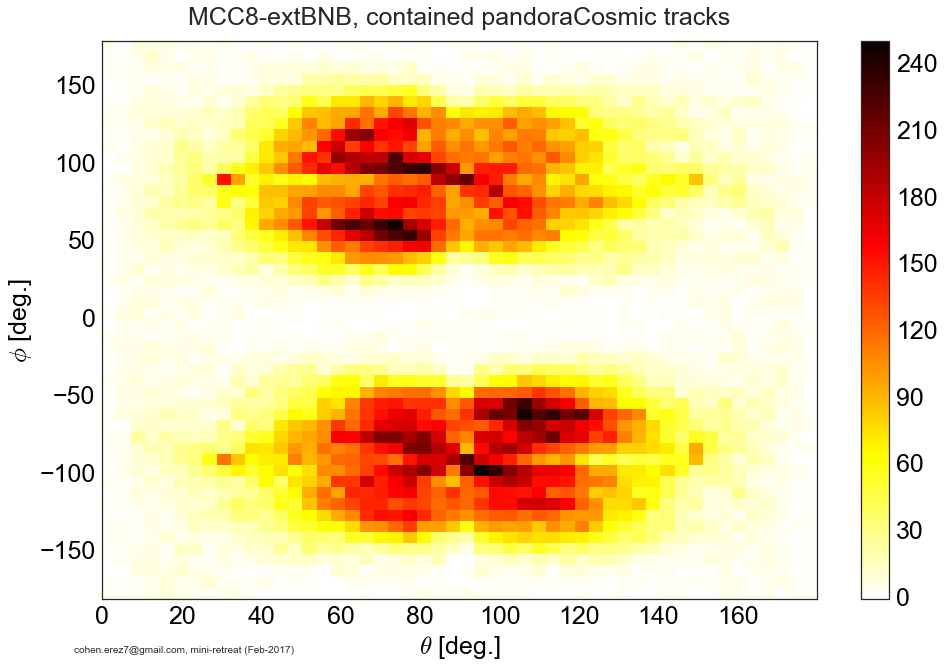

In [214]:
plot_2d_histogram(data=MCC8extBNB , varx='theta' , vary='phi' , mul_x=180./np.pi , mul_y=180./np.pi,
                  x_label = '$\\theta$ [deg.]', y_label='$\\phi$ [deg.]',
                  binsx=50, binsy=50,                   
                  )

(0, 1.05)

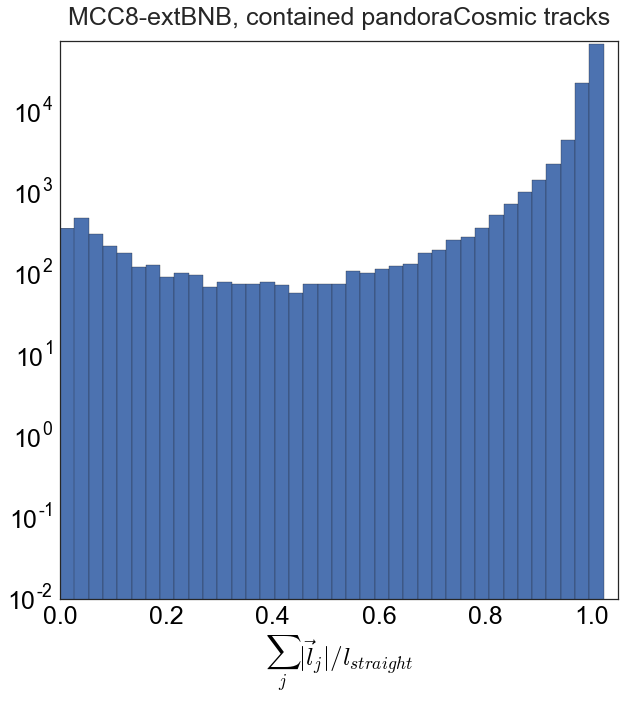

In [185]:
ax , h , bins , patches = plot_1d_hist(MCC8extBNB[MCC8extBNB.distlenratio>-1]['distlenratio'] , xlabel='$\\sum_j |\\vec{l}_j| / l_{straight}$', 
                            bins=np.linspace(0,1.05,40));
ax.set_ylim(0.01,1.1*np.max(h))
ax.set_title('MCC8-extBNB, contained pandoraCosmic tracks',y=1.02,fontsize=25)
ax.set_yscale('log')
ax.set_xlim(0,1.05)